# Decision Trees Homework

Goal:
- sklearn coding: training a tree, decision boundary, tree visualization, metrics

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_regression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc, precision_recall_curve, average_precision_score
)

### (1) Generate a 2D dataset

In [3]:
# Generate 2D dataset
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_clusters_per_class=1,
    class_sep=1.2,
    random_state=0
)

### (2) Split the data for training and testing

In [ ]:
# Split the data for training and testing

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

### (3) Train a decision tree model

In [9]:
# Train the decision tree model

tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

yhat_train = tree.predict(X_train)
yhat_test = tree.predict(X_test)

train_acc = accuracy_score(y_train, yhat_train)
test_acc = accuracy_score(y_test, yhat_test)
cm = confusion_matrix(y_test, yhat_test)

print(f'training accuracy =  {round(train_acc, 2)}\n')
print(f'test accuracy = {round(test_acc, 2)}\n')
print(f'confusion matrix = \n{cm}')

training accuracy =  0.98

test accuracy = 0.96

confusion matrix = 
[[45  0]
 [ 4 41]]


### (4) Plot the decision tree decision boundary

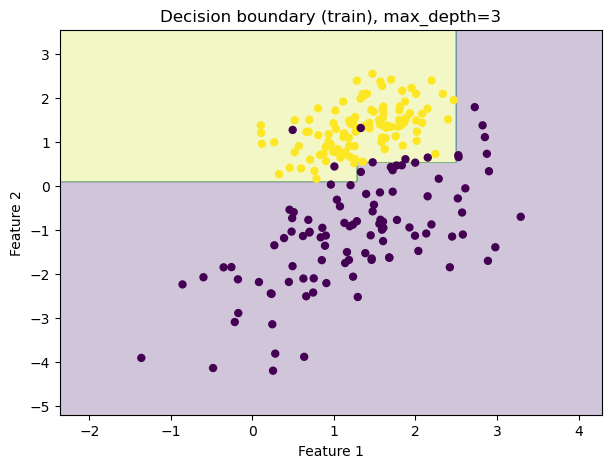

In [10]:
# Decision boundary plot (2D)
def plot_decision_boundary(clf, X, y, title="Decision boundary"):
    x_min, x_max = X[:,0].min() - 1.0, X[:,0].max() + 1.0
    y_min, y_max = X[:,1].min() - 1.0, X[:,1].max() + 1.0

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 400),
        np.linspace(y_min, y_max, 400)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(grid).reshape(xx.shape)

    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, alpha=0.25)
    plt.scatter(X[:,0], X[:,1], c=y, s=25)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(tree, X_train, y_train, title="Decision boundary (train), max_depth=3")


### (5) Visualize the tree

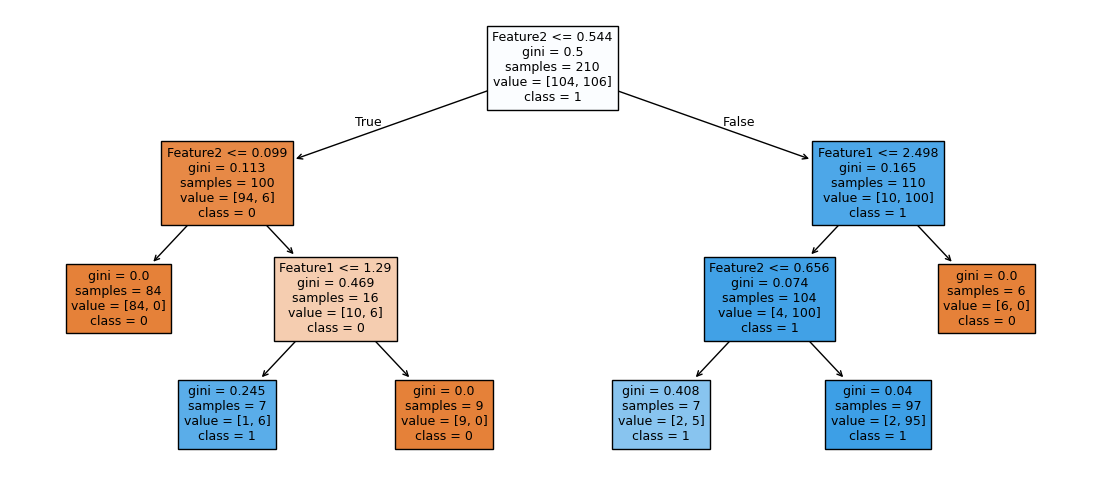

In [5]:
# Visualize the tree
plt.figure(figsize=(14,6))
plot_tree(tree, filled=True, feature_names=["Feature1","Feature2"], class_names=["0","1"], fontsize=9)
plt.show()


### (6) Report the decision tree classifier performance

In [6]:
# Report metrics
print("Training accuracy:", round(train_acc, 2))
print("Test accuracy:", round(test_acc, 2))
print("\nConfusion matrix (test):\n", cm)
print("\nClassification report (test):\n", classification_report(y_test, yhat_test))


Training accuracy: 0.98
Test accuracy: 0.96

Confusion matrix (test):
 [[45  0]
 [ 4 41]]

Classification report (test):
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        45
           1       1.00      0.91      0.95        45

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90



### (7) ROC curve

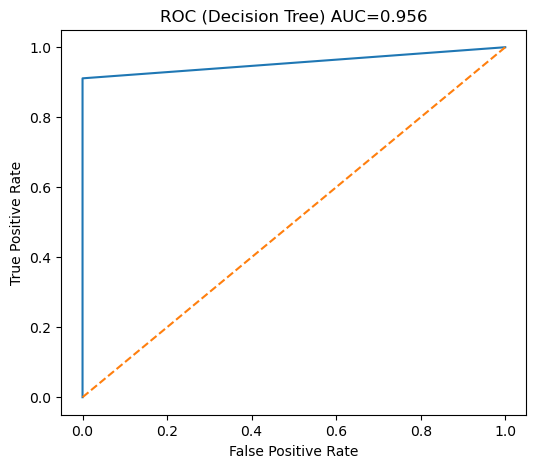

(4, array([0.      , 0.714286, 0.857143, 0.979381]))

In [14]:
# ROC for the single tree
proba_tree = tree.predict_proba(X_test)[:,1]
fpr, tpr, thresh = roc_curve(y_test, proba_tree)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC (Decision Tree) AUC={roc_auc:.3f}")
plt.show()

# Show how many distinct probability values appear
unique_probs = np.unique(np.round(proba_tree, 6))
len(unique_probs), unique_probs[:10]


### (8) PR curve

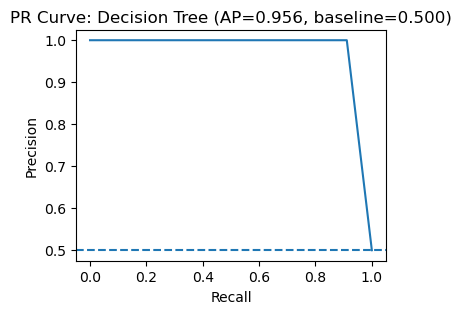

In [10]:
def plot_pr(model_name, y_true, y_prob):
    prec, rec, _ = precision_recall_curve(y_true, y_prob)
    ap = average_precision_score(y_true, y_prob)
    baseline = y_true.mean()

    plt.figure(figsize=(4, 3))
    plt.plot(rec, prec)
    plt.axhline(baseline, linestyle="--")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"PR Curve: {model_name} (AP={ap:.3f}, baseline={baseline:.3f})")
    plt.show()

plot_pr('Decision Tree', y_test, tree.predict_proba(X_test)[:, 1])

### (9): What does $$\texttt{predict\_proba()}$$ mean in a decision tree?

It is the predicted class probability as the fraction of samples of the same class in a leaf.

### (10) Explain why decision trees often output only a few distinct probability values.

Answer:

In a decision tree classifier, every input sample ends up in exactly one leaf node.

Inside each leaf, the model computes:
$$
\text{Predicted probability = fraction of training samples of each class in that leaf}
$$

So if a leaf contains: 10 samples total with 7 positives and 3 negatives, then for every new point that falls into that leaf:

$$
P(Y=1) = 7/10 = 0.7
$$